In [1]:
import sys
from matplotlib import style; style.use('seaborn-notebook')
sys.path.insert(0, '../')
from Models import Potts
from Models.FastIsing import Ising
import networkx as nx, matplotlib.pyplot as plt, numpy as np

n = 10
g = nx.grid_2d_graph(n, n)
# g = nx.erdos_renyi_graph(n, .2)
# g = nx.complete_graph(50)


# states = np.arange(0, 1000).tolist()
states = np.arange(0, 2).tolist()
m =  Potts.Potts(graph = g, \
                 agentStates = states,\
                 updateType = 'single')


# fig, ax = plt.subplots()
# ax.imshow(m.simulate(100))
# fig.show()

m =  Ising(graph = g, updateType = '0.25')
temps = np.logspace(-2, np.log10(m.nNodes),  20)

print(temps)
mag, sus = m.matchMagnetization(temps, 10)

print(mag)

100%|██████████| 20/20 [00:00<00:00, 118.10it/s]

[1.00000000e-02 1.62377674e-02 2.63665090e-02 4.28133240e-02
 6.95192796e-02 1.12883789e-01 1.83298071e-01 2.97635144e-01
 4.83293024e-01 7.84759970e-01 1.27427499e+00 2.06913808e+00
 3.35981829e+00 5.45559478e+00 8.85866790e+00 1.43844989e+01
 2.33572147e+01 3.79269019e+01 6.15848211e+01 1.00000000e+02]
Computing mag per t
1
<<<<< False
1
<<<<< False
11
1
<<<<<11
<<<<< False
1
<<<<< False
1
<<<<< False

 
11<<<<< False
1
<<<<< False

<<<<< False

<<<<< False
<<<<<False 1<<<<<
False
<<<<< False
 False1

<<<<< False

11
<<<<< False

<<<<< False
1101
<<<<< False

<<<<< False
11
<<<<< False
1
<<<<<
<<<<< False
101 False
10
<<<<< False
10
<<<<< False

<<<<< False

<<<<< False
10111

<<<<< False

<<<<< False
1
<<<<< False

111
<<<<< False
<<<<<
<<<<< False
1
<<<<< False
 False
1
<<<<< False

10<<<<< False

<<<<< False
1
<<<<< False
1
<<<<< False

11<<<<<10 False

10
<<<<< False
<<<<<1
<<<<< 1
10
<<<<< False

<<<<< False
1False<<<<< False

<<<<<
1 <<<<< False
False
1
<<<<< False


<<<<< Fals

/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


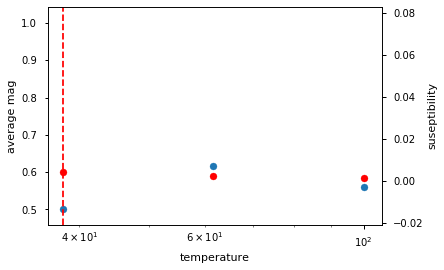

In [2]:
fig, ax = plt.subplots()
ax.scatter(temps, mag)
tax = ax.twinx()
tax.scatter(temps, sus, color = 'red')
ax.set(xlabel = 'temperature', ylabel = 'average mag')
tax.set_ylabel('suseptibility')
idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
# ax.set(xlim = (0, 20))
ax.set(xscale = 'log')
fig.show()

10000
<<<<< False


<IPython.core.display.Javascript object>


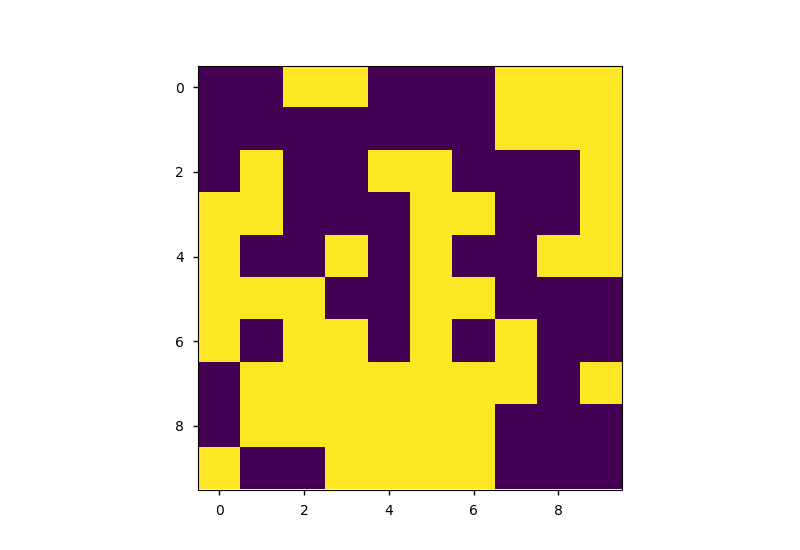

interactive(children=(IntSlider(value=0, description='time', max=9999), Output()), _dom_classes=('widget-inter…

In [3]:
%matplotlib notebook
import ipywidgets as ipy
m.reset()
res = m.simulate(10000)
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n))
fig.show()
@ipy.interact(time = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, value = 0))
def update(time):
    h.set_data(res[time].reshape(n, n))
    fig.canvas.draw(); fig.canvas.flush_events()


In [4]:
m.updateState(m.sampleNodes(1)[0])

1
<<<<< False


<MemoryView of 'ndarray' at 0x7f3c5af40050>

In [8]:
%load_ext autoreload
%autoreload 2
from Models.FastIsing import Ising
from Toolbox import infcy

m = Ising(g)
m.matchMagnetization()

m.matchMagnetization()
snapshots = infcy.getSnapShots(m, 100)
infcy.runMC(m, snapshots, 10, 30)

  5%|▌         | 1/20 [00:00<00:02,  8.22it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Computing mag per t
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
11
<<<<< False
1
<<<<< False
1
<<<<< False

1
<<<<< False
1
<<<<< False
1
<<<<< False
1000<<<<<11
<<<<< False
1
<<<<< False
1
<<<<< False

 False
1
<<<<< False
1
<<<<< False
<<<<<
110001000
<<<<< False
 False

<<<<< False
11

<<<<< False
<<<<<110001

<<<<< False
 <<<<<False

<<<<< False
1
<<<<< False
1
<<<<< False
 <<<<< FalseFalse
1

<<<<< False

<<<<<1
<<<<< False
11 False

1000<<<<< False
<<<<< False1
<<<<< False
11
<<<<< False

<<<<<

1
<<<<< False
1
<<<<< False

 <<<<<10001
<<<<< False
 False
11
<<<<< False

<<<<< False



 30%|███       | 6/20 [00:00<00:01, 12.55it/s]

False
1
<<<<< False
10001
<<<<< False
<<<<< False
1
<<<<< False
1000
<<<<< False
<<<<<1
1
<<<<< False

1
<<<<< False
<<<<<1 False
 1
<<<<< False
1
<<<<< False
1
<<<<< False

1
<<<<< False
<<<<<1 False
False
1
<<<<< False
1

<<<<< False
1000
<<<<< False
11
<<<<< 1
<<<<< False

<<<<<False
11
<<<<< False
1
<<<<< False
1 
<<<<< False
<<<<<
<<<<< False
1
<<<<< False
1False

<<<<< False
 1000False
1
<<<<< False

<<<<<11
<<<<< False1 False

<<<<< False


<<<<< False
11000
<<<<< False
1
<<<<< False
11
<<<<< False
1
<<<<< False



 50%|█████     | 10/20 [00:00<00:00, 11.53it/s]

10001
<<<<< False
1
<<<<< False
<<<<< False

<<<<< False
1
<<<<< False

<<<<< False
1
<<<<< False
11
<<<<< False

<<<<< False
1
<<<<< False
111

<<<<< False

<<<<< False
10001
<<<<< False
1
<<<<< False

1<<<<< False

<<<<< <<<<<False
1 False

11<<<<< False


1<<<<<<<<<<
<<<<< False
 False
1 False1
1
<<<<< False
1

<<<<< False
1<<<<< False

<<<<< 
False<<<<< False
11

<<<<< False
1
<<<<< False
1
<<<<< False
11
<<<<< False

<<<<< False

<<<<< False
111
<<<<<
<<<<< False

<<<<< False
1 False
1
<<<<< False
1
<<<<< False
1
<<<<< False

<<<<< False
11
<<<<< False
1
1
<<<<< False
<<<<<1
<<<<< False
11000
<<<<< False 
<<<<< False

1
<<<<< FalseFalse


<<<<< False
11000
<<<<< False
1

<<<<< False
1<<<<<
<<<<< False
 1
<<<<< False
False
1
1
<<<<< False
1
<<<<< False


 85%|████████▌ | 17/20 [00:00<00:00, 15.32it/s]

1
<<<<< False
1
<<<<< False
1
<<<<< False
<<<<<1 False
1
<<<<< False

1000<<<<< False
1
<<<<< False

<<<<< False
11
<<<<< False
11
<<<<< False

<<<<< False

<<<<< 1False1
<<<<< False

<<<<< False

1
11<<<<<

 False
<<<<<1
<<<<< False
<<<<<11 False

<<<<< False
 1False

<<<<< False

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
111000
<<<<< False
1

1
<<<<<
<<<<< False
<<<<< <<<<< False
False 1

<<<<< False
11
<<<<< False

<<<<< False
False
11
1<<<<<

<<<<< False
 False
<<<<< False
1
<<<<< False
11
<<<<< False

<<<<< False
11
<<<<< False

<<<<< False
11
<<<<< False
1
<<<<< False

11
<<<<< False
<<<<<
<<<<< False1 

<<<<< False
False
11

<<<<< False
<<<<< False
1
11
<<<<< False
<<<<< 
<<<<< False
False
1
<<<<< False
11
<<<<< False

<<<<< False
11
<<<<< False

<<<<< False
11
<<<<< False

<<<<< False
1
<<<<< False
11
<<<<< False

1
<<<<< False
<<<<< False
11
<<<<< False
1
<<<<< False

1<<<<< False
1

1<<<<< False

<<<<< False
<<<<< False
1
<<<<< False
11000
<<<<< False

<<<<< False

  0%|          | 0/20 [00:00<?, ?it/s]

1False
<<<<< False

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1000
<<<<< False
Computing mag per t
1
<<<<< False
1
<<<<< False
11
<<<<< False
1
<<<<< False

<<<<< False
1
<<<<< False
11
<<<<< False
1
<<<<< False
1
<<<<< False

11
<<<<< False
11
<<<<< False
<<<<< False
10001
<<<<< False
1
<<<<< False

<<<<< False
11
<<<<< False
1
<<<<< False

<<<<< False
11000

<<<<< False


<<<<< False
<<<<<11<<<<< 1000
False1000 
<<<<< False

1
<<<<< False
False
<<<<< False

1
<<<<< False
1
<<<<< False

<<<<< False
11
<<<<< False
<<<<<1
<<<<< False False

1


 35%|███▌      | 7/20 [00:00<00:01,  8.44it/s]


<<<<< False
<<<<<1
<<<<< False
11 False
1
<<<<< False

1

<<<<< False
1<<<<< <<<<< False

<<<<< False
10001False

<<<<< False
1
<<<<< False
1
1
<<<<< False

<<<<< 1<<<<< False
1
<<<<< False
1
<<<<< False

<<<<< False
False
11
<<<<< False
11
<<<<< False

<<<<< False
<<<<< False

11
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1000
1
<<<<< False
<<<<< False
1
<<<<< False

1<<<<< False

1
<<<<< False
1
<<<<< False
1<<<<<1 False
1
1

<<<<< False

<<<<< False
<<<<< False
<<<<< False
1
<<<<< False
111
<<<<< False

<<<<< False

1
<<<<< False1
<<<<<1
<<<<< False
1
<<<<< False
1
<<<<< False
1 1
<<<<< False
False

<<<<< False

111
<<<<< False
<<<<<
<<<<< False

<<<<<1
<<<<< False
 11
<<<<< False
1000 False

<<<<< False
1
<<<<< False
1False


<<<<< False
11
<<<<< False
1
<<<<< False

<<<<< False
1
<<<<< False
<<<<< False
1
<<<<< 1False
1000
1<<<<< False

<<<<< False
1
<<<<< False

1
<<<<< False1

<<<<<1<<<<<
1<<<<< False

<<<<< False
11
<<<<< False
 1
<<<<< False

<<<<< False
False
 1
<

 40%|████      | 8/20 [00:00<00:01,  9.07it/s]

1False11


<<<<< False
1
<<<<< False

<<<<< False
11
<<<<< False

<<<<< False
<<<<<111
<<<<< False
1
<<<<< False

<<<<< False
11
<<<<< False

<<<<< False
 False
11

<<<<< False
<<<<< False

<<<<< False
1
<<<<< False
1000
<<<<< False
11
<<<<< False1000

<<<<< False
1
<<<<< False
10001
<<<<< False
1
<<<<< False
1
<<<<< 1000
<<<<< False
1000
<<<<< False

<<<<< False

<<<<< False
1000False
1
<<<<< False
1
<<<<< False

<<<<< False
1
<<<<< False
1000
<<<<< False
1
<<<<< False


 80%|████████  | 16/20 [00:00<00:00, 17.33it/s]

11
<<<<< False
1
<<<<< False

<<<<< False
1
<<<<< False
1000
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
11
<<<<< False
1
<<<<< False

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
11
<<<<< False

<<<<< False
1
<<<<< 1
<<<<< False
1False1
<<<<< False
1
<<<<< False

<<<<< False

1
<<<<< False
1
1<<<<<
<<<<< False
1000
<<<<< False
 False
1
<<<<< False1
<<<<< False

1
<<<<< False
1
<<<<< False
1
11
<<<<< False
1
<<<<< False

1<<<<< False

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
<<<<< False
11

<<<<< False
1<<<<< False

<<<<<1
<<<<<  False
1False
1
<<<<<1 

<<<<< False
False
<<<<< 1
<<<<< False
False
1
<<<<< False
111
<<<<< False
<<<<< False


<<<<< False
1
<<<<< False
1
<<<<< False
11
<<<<< False1

<<<<< False
1
<<<<< False

<<<<< 1
<<<<< False
False
1
<<<<< False1
<<<<< False

1
<<<<<1
<<<<< False
 False
1
<<<<< False
1
1
<<<<< False
1<<<<< False

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False


100%|██████████| 20/20 [00:01<00:00, 19.62it/s]

 False

11
<<<<< False

<<<<< False
11
<<<<< False
1

<<<<< False
<<<<< False
11000
<<<<< False

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1000
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< 

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< 

  0%|          | 0/96 [00:00<?, ?it/s]

1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
11
<<<<< False

<<<<< False
1
1
<<<<< False
1<<<<< False

<<<<< False
1
<<<<< False
1111
<<<<< False

1
<<<<< False
1
<<<<< False
1
1<<<<<
<<<<< False

<<<<< False
11<<<<<
<<<<< False

 False
 
<<<<< False
False
<<<<< False
1
<<<<< False
11
<<<<< False
11
<<<<< False

<<<<< False
1
<<<<< False1

<<<<< False
1
1

<<<<< False
<<<<< False
11
<<<<< False

1
<<<<<1<<<<< 1
<<<<< False
 False
1
<<<<< False1
<<<<< False


False<<<<< False
1<<<<< False

1

<<<<< False
<<<<<11 False1
<<<<< False
1
<<<<< False

<<<<< 
False1
11

<<<<< False

<<<<< False
1
<<<<< False

<<<<< False
11
<<<<< False

<<<<< False<<<<<1

 <<<<< False
11False

1<<<<< False
11
<<<<< False
1

<<<<< False
1<<<<<1
<<<<< False
1

<<<<< False
1 False
<<<<<1 False


<<<<< False
1
<<<<< False

<<<<< False
<<<<< False

<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
1
<<<<< False
11
<<<<< False
1
<<<

100%|██████████| 96/96 [00:00<00:00, 456.13it/s]


<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
300<<<<< False

<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<<300 False

<<<<< False300

<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< 300False
300300


<<<<< False
<<<<< False
300
<<<<< False
<<<<<300 False

<<<<< False
300
<<<<< False
300
300
<<<<< <<<<< False
300False
300
<<<<< False
300
<<<<< False

<<<<< False
300
<<<<< False
300
<<<<< False
300300
<<<<<
<<<<< False
 False
300
<<<<< False
300
<<<<< 300
False
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
300
<<<<< False
Delta =  0.26 sec



/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


({(-1,
   -1,
   -1,
   -1,
   -1,
   -1,
   1,
   1,
   1,
   1,
   -1,
   -1,
   -1,
   -1,
   1,
   1,
   1,
   1,
   -1,
   -1,
   -1,
   -1,
   -1,
   1,
   1,
   1,
   1,
   1,
   1,
   -1,
   -1,
   -1,
   1,
   1,
   1,
   1,
   1,
   1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   1,
   1,
   1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   1,
   -1,
   -1,
   -1,
   1,
   -1,
   -1,
   -1,
   -1,
   -1,
   1,
   1,
   1,
   1,
   1,
   1,
   -1,
   -1,
   -1,
   1,
   1,
   1,
   1,
   1,
   1,
   -1,
   -1,
   -1,
   1,
   1,
   -1,
   -1,
   -1,
   1): array([[[1.        , 0.        ],
          [1.        , 0.        ],
          [1.        , 0.        ],
          ...,
          [1.        , 0.        ],
          [1.        , 0.        ],
          [0.        , 1.        ]],
  
         [[1.        , 0.        ],
          [1.        , 0.        ],
          [1.        , 0.        ],

In [6]:
a = np.random.rand(10, 3)
np.isfortran(a)

False

In [7]:
ratios = m.matched.get('ratios').items()
ratios = np.asarray(list(ratios))

print(ratios.shape, ratios)
fig, ax = plt.subplots()
ax.plot(*m.matched.get('mag')[[0, 1]], linestyle = '-', marker = '.')
ax.scatter(ratios[:,1], ratios[:, 0], color = 'red')
fig.show()

AttributeError: 'Models.FastIsing.Ising' object has no attribute 'matched'

In [ ]:
print(dir(m))